In [1]:
import numpy as np 
import pandas as pd
import textwrap
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from matplotlib.patches import Patch
from scipy import stats
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import obonet
import time
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

In [2]:
# matplotlib setting
# Matplotlib settings for publication-quality plots
base_fontsize = 16
plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})

In [19]:
def format_scientific(x):
    a = x.split('e')[0]
    b = int(x.split('e')[1])
    return a+'\\times'+'10^{'+f'{b:d}'+'}'

# Function to capitalize certain terms
def capitalize_special_terms(text, terms=["DNA", "RNA", "II"]):
    words = text.split()
    capitalized_words = [
        "-".join([part.upper() if part.upper() in terms else part for part in word.split("-")])
        for word in words
    ]
    return " ".join(capitalized_words)


In [4]:
url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
graph = obonet.read_obo(url)

id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}

In [8]:
df_molfunc = pd.read_pickle('molfunc.pkl')
molfunc = df_molfunc[df_molfunc['adj_pvalue']<=0.05].reset_index(drop=True)
# Sort by 'stats' column in ascending order
molfunc_sorted = molfunc.sort_values(by='effect_size', ascending=False).reset_index(drop=True)
print(f"#molfunc: {len(df_molfunc)}, #significant molfunc: {len(molfunc_sorted)}")
molfunc_sorted


#molfunc: 34, #significant molfunc: 8


,GO,ent_prob_GO_Yes,ent_prob_GO_No,effect_size,effect_size_se,effect_size_CI,stats,pvalue,adj_pvalue
0,GO:0003682,"[0.164, 0.417, 0.042, 0.109, 0.256, 0.393, 0.0...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.089787,0.0,"(0.11255976713191278, 0.11255976713191278)",-3.188158,7.609257e-04,6.467869e-03
1,GO:0001227,"[0.047, 0.412, 0.203, 0.055, 0.1, 0.203, 0.11,...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.084497,0.0,"(0.06460698244237773, 0.06460698244237773)",-2.687600,3.769103e-03,2.135825e-02
2,GO:0046872,"[0.594, 0.016, 0.55, 0.155, 0.203, 0.159, 0.08...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.082458,0.0,"(0.07001983842881492, 0.07001983842881492)",-5.634013,9.741812e-09,3.312216e-07
3,GO:0000978,"[0.253, 0.25, 0.333, 0.081, 0.217, 0.047, 0.41...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.064768,0.0,"(0.06269040989296622, 0.06269040989296622)",-3.987837,3.470635e-05,3.933387e-04
4,GO:0003677,"[0.189, 0.159, 0.787, 0.571, 0.109, 0.167, 0.0...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.061260,0.0,"(0.06397026548980239, 0.06397026548980239)",-2.872664,2.077919e-03,1.412985e-02
5,GO:0001228,"[0.061, 0.078, 0.392, 0.042, 0.1, 0.305, 0.192...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.058460,0.0,"(0.0687986585132991, 0.0687986585132991)",-2.319123,1.037011e-02,4.407298e-02
6,GO:0042802,"[0.047, 0.412, 0.038, 0.212, 0.199, 0.057, 0.0...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",-0.086721,0.0,"(-0.10244490611231932, -0.10244490611231932)",4.364213,7.003432e-06,1.190583e-04
7,GO:0019899,"[0.278, 0.393, 0.048, 0.227, 0.173, 0.355, 0.2...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",-0.099962,0.0,"(-0.11396737191727024, -0.11396737191727024)",2.463884,7.245905e-03,3.519439e-02


In [9]:
df_bioproc = pd.read_pickle('bioproc.pkl')
# df_bioproc[df_bioproc['adj_pvalue']<=0.05]
bioproc = df_bioproc[df_bioproc['adj_pvalue']<=0.05].reset_index(drop=True)
# Sort by 'stats' column in ascending order
bioproc_sorted = bioproc.sort_values(by='effect_size', ascending=False).reset_index(drop=True)
print(f"#Biological Process: {len(df_bioproc)}, #significant Biological Process: {len(bioproc_sorted)}")
bioproc_sorted


#Biological Process: 23, #significant Biological Process: 6


,GO,ent_prob_GO_Yes,ent_prob_GO_No,effect_size,effect_size_se,effect_size_CI,stats,pvalue,adj_pvalue
0,GO:0007155,"[0.155, 0.245, 0.091, 0.348, 0.138, 0.045, 0.3...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.077423,0.0,"(0.08901359769841209, 0.08901359769841209)",-2.415912,0.008116,0.037226
1,GO:0045944,"[0.047, 0.412, 0.2, 0.161, 0.787, 0.061, 0.078...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.061778,0.0,"(0.036798279098932865, 0.036798279098932865)",-3.252651,0.000587,0.004501
2,GO:0000122,"[0.134, 0.047, 0.412, 0.022, 0.136, 0.172, 0.1...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.059136,0.0,"(0.07664788371114539, 0.07664788371114539)",-2.792881,0.002664,0.015319
3,GO:0045893,"[0.203, 0.159, 0.256, 0.392, 0.08, 0.084, 0.13...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.059087,0.0,"(-0.006467042344395534, -0.006467042344395534)",-2.343314,0.009711,0.037226
4,GO:0006357,"[0.253, 0.25, 0.125, 0.333, 0.223, 0.081, 0.21...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.051779,0.0,"(0.050132653695822316, 0.050132653695822316)",-3.431705,0.000305,0.004501
5,GO:0015031,"[0.124, 0.055, 0.304, 0.043, 0.076, 0.066, 0.0...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",-0.137608,0.0,"(-0.10695798655848453, -0.10695798655848453)",3.349031,0.000479,0.004501


In [10]:
df_cellcom = pd.read_pickle('cellcom.pkl')
# df_bioproc = pd.read_pickle('bioproc.pkl')
# df_bioproc[df_bioproc['adj_pvalue']<=0.05]
cellcom = df_cellcom[df_cellcom['adj_pvalue']<=0.05].reset_index(drop=True)
# Sort by 'stats' column in ascending order
cellcom_sorted = cellcom.sort_values(by='effect_size', ascending=False).reset_index(drop=True)
print(f"#Cellular Component: {len(df_cellcom)}, #significant Cellular Component: {len(cellcom_sorted)}")
cellcom_sorted

#Cellular Component: 33, #significant Cellular Component: 14


,GO,ent_prob_GO_Yes,ent_prob_GO_No,effect_size,effect_size_se,effect_size_CI,stats,pvalue,adj_pvalue
0,GO:0014069,"[0.481, 0.389, 0.076, 0.243, 0.231, 0.082, 0.6...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.099244,0.0,"(0.10046432743189934, 0.10046432743189934)",-2.424367,0.008063,0.022175
1,GO:0016607,"[0.063, 0.256, 0.393, 0.074, 0.07, 0.102, 0.07...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.096196,0.0,"(0.025109270237942433, 0.025109270237942433)",-2.975942,0.001555,0.005700
2,GO:0005634,"[0.498, 0.235, 0.253, 0.134, 0.25, 0.125, 0.33...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.040784,0.0,"(0.01939200030068759, 0.01939200030068759)",-3.614893,0.000151,0.000997
3,GO:0005654,"[0.125, 0.047, 0.412, 0.203, 0.298, 0.003, 0.1...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",0.035418,0.0,"(0.03800663245497729, 0.03800663245497729)",-2.771233,0.002803,0.009251
4,GO:0005576,"[0.169, 0.317, 0.298, 0.139, 0.095, 0.248, 0.5...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",-0.051217,0.0,"(-0.05475560560309505, -0.05475560560309505)",2.305651,0.010691,0.027140
5,GO:0016020,"[0.129, 0.119, 0.155, 0.042, 0.31, 0.27, 0.065...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",-0.053495,0.0,"(-0.05684403987639222, -0.05684403987639222)",3.508101,0.000230,0.001265
6,GO:0070062,"[0.142, 0.426, 0.075, 0.122, 0.195, 0.076, 0.0...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",-0.055282,0.0,"(-0.06882020822427151, -0.06882020822427151)",2.510983,0.006110,0.018331
7,GO:0005789,"[0.038, 0.212, 0.097, 0.15, 0.068, 0.124, 0.05...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",-0.062884,0.0,"(-0.07939719418889567, -0.07939719418889567)",2.239832,0.012784,0.030133
8,GO:0048471,"[0.199, 0.111, 0.142, 0.132, 0.085, 0.012, 0.0...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",-0.085237,0.0,"(-0.09224606824740725, -0.09224606824740725)",3.011348,0.001369,0.005648
9,GO:0032991,"[0.392, 0.08, 0.07, 0.2, 0.051, 0.057, 0.056, ...","[0.094, 0.444, 0.091, 0.44, 0.4, 0.452, 0.421,...",-0.087953,0.0,"(-0.09211667708739163, -0.09211667708739163)",3.122661,0.000950,0.004477


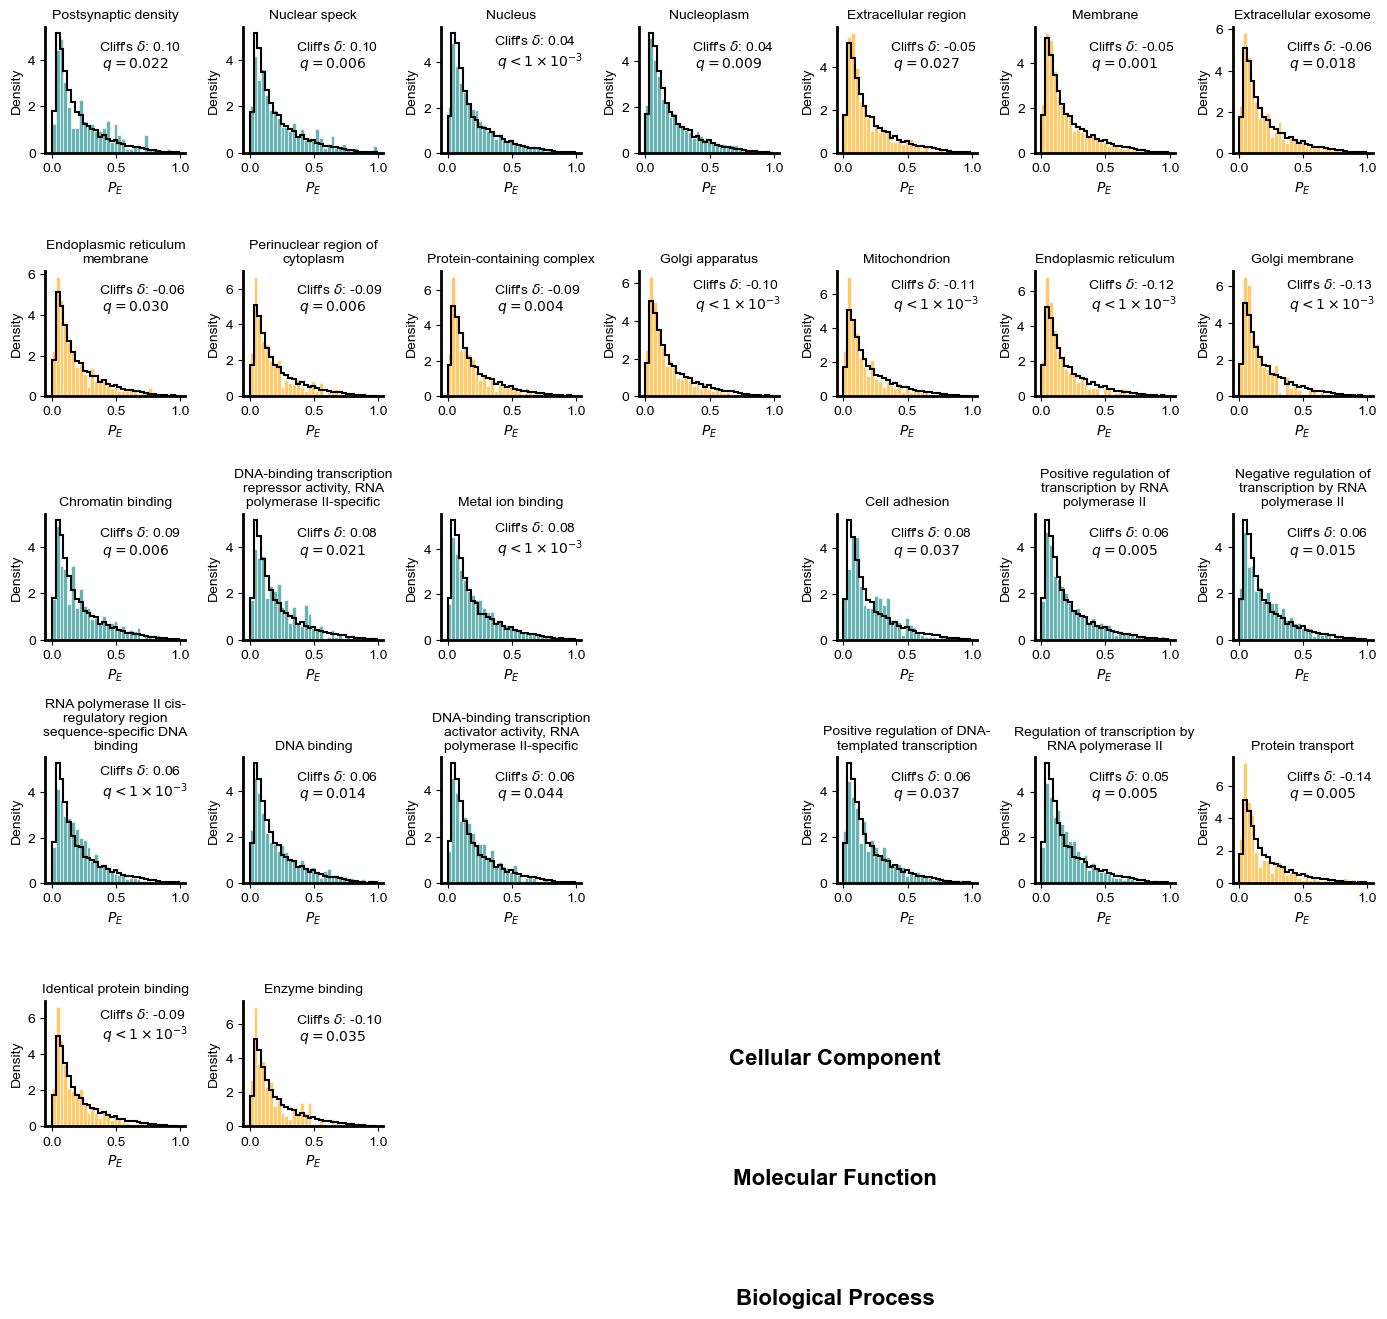

In [21]:
bin_width = .03
bins = np.arange(0, 1,bin_width)
x = bins[:-1]+bin_width/2.

# Create 3x3 subplots
fig, axes = plt.subplots(nrows=5, ncols=7, figsize=(14, 12))
axes = axes.flatten()
# Add titles for each category
fig.text(0.6, 0.1, "Cellular Component", ha="center", fontsize=16, weight="bold")
fig.text(0.6, 0.0, "Molecular Function", ha="center", fontsize=16, weight="bold")
fig.text(0.6, -0.1, "Biological Process", ha="center", fontsize=16, weight="bold")

# cellcom
list_ax = list(range(0, 14))# + [16, 17]
# Plot each row
for idx, row in cellcom_sorted.iterrows():
    ax = axes[list_ax[idx]]
    h1 = np.histogram(row["ent_prob_GO_Yes"], bins=bins, density=True)[0]
    h2 = np.histogram(row["ent_prob_GO_No"], bins=bins, density=True)[0]
    
    eff_size =  row['effect_size']
    c = 'orange' if eff_size < 0 else 'teal' # if color is orange mean pE in this GO term less than PE in non-GO term
    eff_size_str = f"{eff_size:.2f}"
    # format p-value
    adj_p = row['adj_pvalue']
    adj_p_str = f"={adj_p:.3f}" if adj_p > 0.001 else "<1\\times10^{-3}"
    
    ax.bar(x, h1, alpha=0.6, width=bin_width, edgecolor='white', color=c, linewidth=0.8,
          label=f"Cliff's $\delta$: {eff_size_str} \n $q {adj_p_str}$")
    hist = ax.hist(row["ent_prob_GO_No"], bins=bins, density=True, histtype='step', color='black', linewidth=1.5)
    
    go_term = str(id_to_name[row['GO']]).capitalize()
    go_term = capitalize_special_terms(go_term)  # Apply the capitalization function
    wrapped_go_term = "\n".join(textwrap.wrap(go_term, width=26))
    ax.set_title(f'{wrapped_go_term}', fontsize=10)
    ax.set_ylabel("Density")
    ax.set_xlabel(r"$P_{E}$")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
#     ax.legend()
    legend = ax.legend(handlelength=0,frameon=False,borderpad=0,loc=(.30,.64))
    legend.get_title().set_ha('center')   
#     ax.grid(True)

# Add vertical space between categories
plt.subplots_adjust(hspace=6.0)  # Adjust the value to increase/decrease spacing

# molfunc
list_ax = [14, 15, 16, 21, 22, 23, 28, 29]
# Plot each row
for idx, row in molfunc_sorted.iterrows():
    ax = axes[list_ax[idx]]
    h1 = np.histogram(row["ent_prob_GO_Yes"], bins=bins, density=True)[0]
    h2 = np.histogram(row["ent_prob_GO_No"], bins=bins, density=True)[0]
    eff_size =  row['effect_size']
    c = 'orange' if eff_size < 0 else 'teal' # if color is orange mean pE in this GO term less than PE in non-GO term
    eff_size_str = f"{eff_size:.2f}"
    # format p-value
    adj_p = row['adj_pvalue']
    adj_p_str = f"={adj_p:.3f}" if adj_p > 0.001 else "<1\\times10^{-3}"
    
    ax.bar(x, h1, alpha=0.6, width=bin_width, edgecolor='white', color=c, linewidth=0.8,
          label=f"Cliff's $\delta$: {eff_size_str} \n $q {adj_p_str}$")
    hist = ax.hist(row["ent_prob_GO_No"], bins=bins, density=True, histtype='step', color='black', linewidth=1.5)
    
    go_term = str(id_to_name[row['GO']]).capitalize()
    go_term = capitalize_special_terms(go_term)  # Apply the capitalization function
    wrapped_go_term = "\n".join(textwrap.wrap(go_term, width=26))
    ax.set_title(f'{wrapped_go_term}', fontsize=10)

    ax.set_ylabel("Density")
    ax.set_xlabel(r"$P_{E}$")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
#     ax.legend()
    legend = ax.legend(handlelength=0,frameon=False,borderpad=0,loc=(.30,.64))
    legend.get_title().set_ha('center') 

# Add vertical space between categories
plt.subplots_adjust(hspace=6.0)  # Adjust the value to increase/decrease spacing

# bioproc
list_ax = [18, 19, 20, 25, 26, 27]
# Plot each row
for idx, row in bioproc_sorted.iterrows():
    ax = axes[list_ax[idx]]
    h1 = np.histogram(row["ent_prob_GO_Yes"], bins=bins, density=True)[0]
    h2 = np.histogram(row["ent_prob_GO_No"], bins=bins, density=True)[0]
    eff_size =  row['effect_size']
    c = 'orange' if eff_size < 0 else 'teal' # if color is orange mean pE in this GO term less than PE in non-GO term
    eff_size_str = f"{eff_size:.2f}"
    # format p-value
    adj_p = row['adj_pvalue']
    adj_p_str = f"={adj_p:.3f}" if adj_p > 0.001 else "<1\\times10^{-3}"
    
    ax.bar(x, h1, alpha=0.6, width=bin_width, edgecolor='white', color=c, linewidth=0.8,
          label=f"Cliff's $\delta$: {eff_size_str} \n $q {adj_p_str}$")
    hist = ax.hist(row["ent_prob_GO_No"], bins=bins, density=True, histtype='step', color='black', linewidth=1.5)
    
    go_term = str(id_to_name[row['GO']]).capitalize()
    go_term = capitalize_special_terms(go_term)  # Apply the capitalization function
    wrapped_go_term = "\n".join(textwrap.wrap(go_term, width=30))
    ax.set_title(f'{wrapped_go_term}', fontsize=10)

    ax.set_ylabel("Density")
    ax.set_xlabel(r"$P_{E}$")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
    legend = ax.legend(handlelength=0,frameon=False,borderpad=0,loc=(.30,.64))
    legend.get_title().set_ha('center')   
#     ax.grid(True)

# Remove empty subplots if any
list_to_del = [17, 24, 30, 31, 32, 33, 34]
for idx in list_to_del: #range(len(cellcom_sorted), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig(f'GO_analysis.png', dpi=600, bbox_inches='tight')
# plt.savefig("GO_analysis.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [23]:
molfunc_sorted.to_pickle('molfunc_significant.pkl')
cellcom_sorted.to_pickle('cellcom_significant.pkl')
bioproc_sorted.to_pickle('bioproc_significant.pkl')